# Predicción de Tratamientos químicos de Integridad & Corrosión para pozos 

<img src="files/Artificial-neural-network-architecture.png">

Importación de los paquetes a utilizar en este cuaderno. Tener en cuenta que los mismos deben estar previamente instalados en el global/virtual environment.

In [835]:
import numpy as np 
import pandas as pd
import matplotlib as plot
import seaborn as sns
import os

Lectura del archivo excel que contiene los datos de recomendaciones. 

In [836]:
df=pd.read_excel(os.path.join('Data', 'BD Autom Recomendaciones.xlsx'))
df.head()

,Número de protocolo,Responsable,Operadora,Pozo,Batería,Yacimiento,Base,Fecha de emisión,SLA,Prod Bruta,...,Costo [U$S/mes] TQ Propuesto 2,PQ Propuesto 3,Modalidad PQ Propuesto 3,Punto Inyección PQ Propuesto 3,Tasa Inyección (l/d) PQ Propuesto 3,Volumen Batch PQ Propuesto 3 (l),Frecuencia batcheo PQ Propuesto 3,Concentración [ppmV] PQ Propuesto 3,Precio del PQ [U$S/l] Propuesto 3,Costo [U$S/mes] TQ Propuesto 3
0,0,Ingeniero 1,Operadora 1 Santa Cruz,0,0,El Chola,Las Heras,2020-02-27,BES,60.0,...,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ingeniero 2,Operadora 1 Chubut,1,1,El Trébol,Comodoro Rivadavia,2020-10-27,AIB,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Ingeniero 2,Operadora 1 Chubut,2,2,El Trébol,Comodoro Rivadavia,2020-10-27,BES,222.0,...,670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ingeniero 2,Operadora 1 Chubut,3,3,El Trébol,Comodoro Rivadavia,2020-10-28,AIB,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ingeniero 2,Operadora 1 Chubut,4,4,El Trébol,Comodoro Rivadavia,2020-10-28,AIB,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [837]:
df.describe()

,Número de protocolo,Pozo,Batería,Prod Bruta,Prod Neta,Corte de agua (%),SD,OT,CIP,Corrosión según Fe+2,...,Costo [U$S/mes] TQ Propuesto 1,Volumen Batch PQ Propuesto 2 (l),Concentración [ppmV] PQ Propuesto 2,Precio del PQ [U$S/l] Propuesto 2,Costo [U$S/mes] TQ Propuesto 2,Tasa Inyección (l/d) PQ Propuesto 3,Volumen Batch PQ Propuesto 3 (l),Concentración [ppmV] PQ Propuesto 3,Precio del PQ [U$S/l] Propuesto 3,Costo [U$S/mes] TQ Propuesto 3
count,187.000000,187.000000,187.000000,187.000000,187.000000,185.000000,186.000000,186.000000,186.000000,185.000000,...,169.000000,60.000000,39.000000,101.00000,101.000000,6.000000,19.000000,6.000000,25.000000,25.000000
mean,93.000000,93.000000,93.000000,83.375401,3.397241,93.543345,0.953948,1.172203,255.699475,1.517122,...,503.650754,128.950000,75.897436,3.45505,561.917492,6.833333,106.315789,49.333333,3.129200,531.120167
std,54.126395,54.126395,54.126395,68.800550,6.322373,10.059187,0.633351,0.538564,244.094118,2.091522,...,262.280677,58.640076,38.327395,0.48872,224.360954,1.471960,46.092965,2.503331,0.421178,158.790041
min,0.000000,0.000000,0.000000,2.000000,0.080000,18.000000,-0.800000,-0.500000,-727.000000,0.000000,...,102.900000,20.000000,41.000000,2.07000,145.500000,5.000000,40.000000,47.000000,2.070000,207.000000
25%,46.500000,46.500000,46.500000,30.000000,1.110000,95.000000,0.528309,0.865301,110.033823,0.300000,...,343.000000,100.000000,54.500000,3.04000,370.000000,6.000000,100.000000,48.000000,2.910000,439.000000
50%,93.000000,93.000000,93.000000,65.000000,2.160000,96.500000,0.912174,1.200000,256.500000,0.840000,...,432.000000,100.000000,63.000000,3.43000,540.000000,6.500000,100.000000,48.500000,3.040000,568.000000
75%,139.500000,139.500000,139.500000,125.000000,4.190000,97.500000,1.400000,1.515422,373.785932,1.702213,...,686.000000,200.000000,78.000000,3.55000,694.000000,7.750000,100.000000,49.750000,3.430000,582.000000
max,186.000000,186.000000,186.000000,356.000000,82.100000,99.900000,2.519783,2.525622,1096.725139,13.871209,...,1664.000000,200.000000,226.000000,4.44000,1420.000000,9.000000,200.000000,54.000000,4.390000,832.000000


In [838]:
for col in df.columns:
    print(col)

Número de protocolo
Responsable
Operadora
Pozo
Batería
Yacimiento
Base
Fecha de emisión
SLA
Prod Bruta
Prod Neta
Corte de agua (%)
Fecha Control
Objetivo Recomendación
SD
OT
CIP
Corrosión según Fe+2
Corr según CO2 (aq)
Corr según CO2 (g)
Corr según H2S (g)
BSRp
PQ Anterior 1
Modalidad PQ Anterior 1
Punto Inyección PQ Anterior 1
Tasa Inyección (l/d)  PQ Anterior 1 
Volumen Batch PQ Anterior 1 (l)
Frecuencia batcheo PQ Anterior 1
Concentración [ppmV] PQ Anterior 1
Precio del PQ [U$S/l] Anterior 1
Costo [U$S/mes] TQ Anterior 1
PQ Anterior 2
Modalidad PQ Anterior 2
Punto Inyección PQ Anterior 2
Tasa Inyección (l/d)  PQ Anterior 2 
Volumen Batch PQ Anterior 2 (l)
Frecuencia batcheo PQ Anterior 2
Concentración [ppmV] PQ Anterior 2
Precio del PQ [U$S/l] Anterior 2
Costo [U$S/mes] TQ Anterior 2
PQ Propuesto 1
Modalidad PQ Propuesto 1
Punto Inyección PQ Propuesto 1
Tasa Inyección (l/d)  PQ Propuesto 1 
Volumen Batch PQ Propuesto 1 (l)
Frecuencia batcheo PQ Propuesto 1
Concentración [ppmV] PQ Pr

Filtrado de la base de datos para ver sólo los datos a utilizar. Para entrenar esta Neural Network, se utilizarán solamente las recomendaciones emitidas para la "Operadora 1" de la provincia de Chubut.

In [839]:
df= df.loc[df["Operadora"]=="Operadora 1 Chubut"]
df=df.reset_index()

### Las variables de entrada para la Neural Network serían las siguientes 11:

    SD, OT, CIP, Corr Fe+2, Corr CO2 (aq), Corr H2S (g), Corr CO2 (g), BSRp, Prod Bruta, Prod Neta y SLA

#### Definición de las variables de entrada cualitativas en términos binarios

Se elige definir como 1 cuando el SLA es BES y 0 cuando es AIB o PCP

In [840]:
for i in range(len(df['Número de protocolo'])):
    if 'BES' in str(df['SLA'][i]):
        df['SLA'][i]=1
    else:
        df['SLA'][i]=0

var_cual=df['SLA']
var_cual

<ipython-input-840-67566288c990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SLA'][i]=0
<ipython-input-840-67566288c990>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SLA'][i]=1


0      0
1      1
2      0
3      0
4      1
      ..
172    0
173    0
174    0
175    1
176    1
Name: SLA, Length: 177, dtype: object

#### Normalizar a la media variables de entrada cuantitativas

La normalización utilizada en el presente proyecto está dada por:

        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

        X_scaled = X_std * (max - min) + min

        where min, max = feature_range.

In [841]:
var_cuant=df[['SD','OT','CIP', 'Prod Bruta', 'Prod Neta','Corr según H2S (g)','BSRp','Corrosión según Fe+2','Corr según CO2 (aq)','Corr según CO2 (g)']]

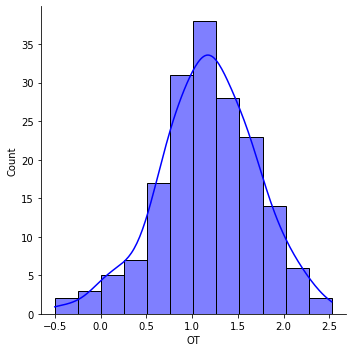

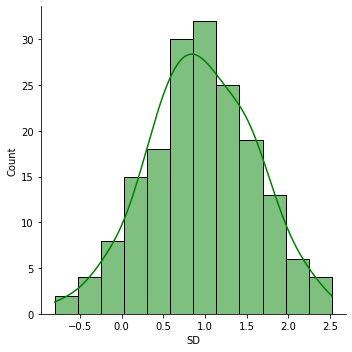

In [842]:
sns.displot(df['OT'], kind='hist', kde=True, bins=int(6/0.5), color = 'blue')
sns.displot(df['SD'], kind='hist', kde=True, bins=int(6/0.5), color = 'green')

In [843]:
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

In [844]:
scaler=MinMaxScaler()

In [845]:
var_cuant[['SD','OT','CIP', 'Prod Bruta', 'Prod Neta','Corr según H2S (g)','BSRp','Corrosión según Fe+2','Corr según CO2 (aq)','Corr según CO2 (g)']]=scaler.fit_transform(var_cuant)
var_cuant.fillna(0, inplace= True)
var_cuant.head()


<ipython-input-845-319456b0b577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_cuant[['SD','OT','CIP', 'Prod Bruta', 'Prod Neta','Corr según H2S (g)','BSRp','Corrosión según Fe+2','Corr según CO2 (aq)','Corr según CO2 (g)']]=scaler.fit_transform(var_cuant)
C:\Users\gfernandez\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\gfernandez\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:69

,SD,OT,CIP,Prod Bruta,Prod Neta,Corr según H2S (g),BSRp,Corrosión según Fe+2,Corr según CO2 (aq),Corr según CO2 (g)
0,0.572327,0.594919,0.582524,0.079096,0.005365,0.141212,0.000,0.027395,0.194619,0.003883
1,0.632571,0.561868,0.629355,0.621469,0.039624,0.070606,0.625,0.250158,0.809709,0.004854
2,0.632571,0.694072,0.629355,0.059322,0.013046,0.000000,0.125,0.134812,0.000000,0.029773
3,0.210857,0.231357,0.384923,0.070621,0.012192,0.000000,0.250,0.340994,0.080184,0.003560
4,0.930673,0.916474,0.480552,0.522599,0.022860,0.315261,0.000,0.058022,0.187280,0.028907


#### Unir variables cualitativas con cuantitativas en dataframe de variables de entrada

In [846]:
var_input=var_cuant.join(var_cual)
var_input.head()

,SD,OT,CIP,Prod Bruta,Prod Neta,Corr según H2S (g),BSRp,Corrosión según Fe+2,Corr según CO2 (aq),Corr según CO2 (g),SLA
0,0.572327,0.594919,0.582524,0.079096,0.005365,0.141212,0.000,0.027395,0.194619,0.003883,0
1,0.632571,0.561868,0.629355,0.621469,0.039624,0.070606,0.625,0.250158,0.809709,0.004854,1
2,0.632571,0.694072,0.629355,0.059322,0.013046,0.000000,0.125,0.134812,0.000000,0.029773,0
3,0.210857,0.231357,0.384923,0.070621,0.012192,0.000000,0.250,0.340994,0.080184,0.003560,0
4,0.930673,0.916474,0.480552,0.522599,0.022860,0.315261,0.000,0.058022,0.187280,0.028907,1


### Las variables de salida para la Neural Network serían las siguientes 6, representando cada tipo de Tratamiento de I&C:

                        DS   = Tratamiento desincrustante batch
                        IC = Tratamiento inhibidor de incrustaciones continuo
                        CY.C = Tratamiento inhibidor de corrosión continuo  
                        CY.B = Tratamiento inhibidor de corrosión batch
                        BX.C = Tratamiento bactericida continuo
                        BX.B = Tratamiento bactericida batch

#### Definición de las variables de salida cualitativas en términos binarios

Se crean columnas conteniendo 1 o 0 en cada fila en función de haberse o no recomendado determinado tratamiento.

In [847]:
output=['DS', 'IC','CY.C', 'CY.B', 'BX.C','BX.B']

var_output=pd.DataFrame(np.zeros((len(df['Número de protocolo']),len(output))), columns=output)

In [848]:
DI=['DS','IC']
num=[1,2,3]

for j in DI:
    for n in num:
        for i in range(len(var_output[j])): 
            if j in str(df[f'PQ Propuesto {n}'][i]):
                var_output[j][i]=1
            else: 
                None

In [849]:
CB=['CY', 'BX']

for n in num:
    for PQ in CB:    
        for i in range(len(var_output['DS'])): 
            if PQ in str(df[f'PQ Propuesto {n}'][i]):
                if 'Batch' in str(df[f'Modalidad PQ Propuesto {n}'][i]): 
                    var_output[PQ+'.B'][i]=1
                else:
                    var_output[PQ+'.C'][i]=1
            else:
                None

var_output

,DS,IC,CY.C,CY.B,BX.C,BX.B
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
172,0.0,0.0,0.0,1.0,0.0,0.0
173,0.0,0.0,0.0,1.0,0.0,0.0
174,0.0,0.0,0.0,1.0,0.0,1.0
175,0.0,1.0,0.0,1.0,0.0,0.0


Se realiza un split sobre el dataset para luego testear la precisión del modelo. Se decida utilizar 80% de los datos para entrenar la red neuronal y el 20% restante para el accuracy test. Los datos son segmentados de manera aleatoria.

In [850]:
from sklearn.model_selection import train_test_split

In [851]:
var_input=np.asarray(var_input).astype('float32')
X=var_input
y=var_output

In [852]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [853]:
import tensorflow as tf
from tensorflow import keras

Se importan de Keras los módulos Dense, Dropout y Sequential.

        La técnica Dropout se utiliza para minimizar el over-fitting y consite en reducir de manera aleatoria el número de neuronas interconectadas dentro de una red neuronal. A cada iteración del entrenamiento, cada neurona tiene una probabilidad de que su contribución sea considerada o no para las neuronas conectadas. 

        Dense

        Sequential

In [854]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [855]:
model=keras.Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [856]:
from tensorflow.keras.callbacks import EarlyStopping

In [857]:
parada=EarlyStopping(monitor='val_loss',patience=5,min_delta=0)

In [858]:
model.fit(X_train,y_train,epochs=700,validation_data=(X_test,y_test))

Epoch 499/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3554 - val_loss: 0.3295
Epoch 500/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3376 - val_loss: 0.3301
Epoch 501/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3341 - val_loss: 0.3308
Epoch 502/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3318 - val_loss: 0.3319
Epoch 503/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3394 - val_loss: 0.3324
Epoch 504/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3349 - val_loss: 0.3338
Epoch 505/700
5/5 [==============================] - 0s 6ms/step - loss: 0.3434 - val_loss: 0.3337
Epoch 506/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3316 - val_loss: 0.3307
Epoch 507/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3548 - val_loss: 0.3296
Epoch 508/700
5/5 [==============================] - 0s 5ms/step - loss: 0.3610 - val_loss: 0.3293
Epoch 509/

<AxesSubplot:>

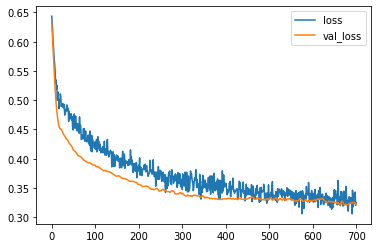

In [859]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [860]:
from sklearn.metrics import confusion_matrix, classification_report

In [861]:
predictions=pd.DataFrame(model.predict(X_test),columns=y_test.columns)
df=predictions.round(decimals=0)

In [862]:
for i in range(6):
    print(y_test.columns[i])
    print(confusion_matrix(y_test.iloc[:,i],df.iloc[:,i]))
    print(' ')

DS
[[35  0]
 [ 1  0]]
 
IC
[[22  4]
 [ 2  8]]
 
CY.C
[[29  0]
 [ 7  0]]
 
CY.B
[[ 8  8]
 [ 7 13]]
 
BX.C
[[36]]
 
BX.B
[[21  0]
 [ 3 12]]
 


In [863]:
for i in range(7):
    print(y_test.columns[i])
    print(classification_report(y_test.iloc[:,i],df.iloc[:,i]))
    print(' ')

DS
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        35
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97        36
   macro avg       0.49      0.50      0.49        36
weighted avg       0.95      0.97      0.96        36

 
IC
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        26
         1.0       0.67      0.80      0.73        10

    accuracy                           0.83        36
   macro avg       0.79      0.82      0.80        36
weighted avg       0.85      0.83      0.84        36

 
CY.C
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        29
         1.0       0.00      0.00      0.00         7

    accuracy                           0.81        36
   macro avg       0.40      0.50      0.45        36
weighted avg       0.65      0.81      0.72        36

 
CY

IndexError: index 6 is out of bounds for axis 0 with size 6